#  Poisson brackets and deformation quantization in SageMath

This tutorial is an introduction to computations with Poisson brackets and their deformations quantizations, in the form of Kontsevich's star product.  This tutorial reflects the first public release of the code and we warn the user that various syntax may change as the project evolves.  In particular, it may be desirable to rebuild some of the functionality using the SageManifolds package which was included in the main SageMath source tree as we were finalizing our preliminary release.  Please contact the developers if you are interested in helping with such changes to the code.

***
## Getting the code
***

The code is stored in [a BitBucket repository](https://bitbucket.org/bpym/starproducts/src). A copy of it can be created by running
~~~~
git clone https://bitbucket.org/bpym/starproducts.git
~~~~

Once it has been checked out, the code can be used by running `sage` in the `StarProducts/src` directory, and then running 

In [1]:
from all import *

This will import all of the classes described below.

It is also possible to set up Sage such that the classes are loaded automatically. This can be done by adding the following lines to `~/.sage/init.sage`:
~~~~
starproducts_path = '/path/to/StarProducts/src'

import imp
import os
sys.path.append(starproducts_path)

starproducts = imp.load_source('starproducts', os.path.join(starproducts_path, 'all.py'))
from starproducts import *
~~~~

***
## Poisson brackets
***

### Creating and calculating with a simple Poisson bracket

To compute with Poisson brackets, we use the `PoissonBracket` class. We can create a Poisson bracket by providing a list of coordinate variables and their matrix of Poisson brackets.  For example, we can create the standard two-dimensional Darboux Poisson bracket in canonical coordinates $(x,y)$ with $\{x,y\}=1$:

In [2]:
var('x,y')
P = PoissonBracket([x,y] , [[0,1],[-1,0]])

We can recover the coordinates $x,y$ and the matrix of brackets as follows:

In [3]:
P.vars

(x, y)

In [4]:
P.poisson_matrix

[ 0  1]
[-1  0]

We can now compute the Poisson bracket of expressions depending on $x$ and $y$:

In [5]:
P.bracket(x,y^2)

2*y

Variables other than $x$ and $y$ will be treated as constants:

In [6]:
var('a,b')
P.bracket(x , a*y + b*y^2 )

2*b*y + a

We can also define arbitrary functions of $x$ and $y$ and compute their bracket symbolically:

In [7]:
f = function('f')(x,y)
g = function('g')(x,y)
P.bracket(f, g)

-diff(f(x, y), y)*diff(g(x, y), x) + diff(f(x, y), x)*diff(g(x, y), y)

This expression is a bit hard to read.  But in version 7.5 of Sage and later, SageManifolds provides a useful command for formatting expression involving partial derivatives in a more readable manner.

In [8]:
from sage.manifolds.utilities import ExpressionNice
ExpressionNice(P.bracket(f,g))

-d(f)/dy*d(g)/dx + d(f)/dx*d(g)/dy

Let's switch our display to render in $\LaTeX$ and look again.

In [9]:
%display latex
P.bracket(f,g)

-diff(f(x, y), y)*diff(g(x, y), x) + diff(f(x, y), x)*diff(g(x, y), y)

In [10]:
ExpressionNice(P.bracket(f,g))

-d(f)/dy*d(g)/dx + d(f)/dx*d(g)/dy

### Hamiltonian vector fields

We can compute the Hamiltonian vector field of a function.  By default, the Hamiltonian of a function $f$ is returned as `function` object that encodes the Hamiltonian derivation $\{f,-\}$.  (In the future this will hopefluly return a `VectorField` object.)  For example, the Hamiltonian vector field for the simple harmonic oscillator is given by

In [11]:
Hsho = P.hamiltonian(x^2/2 + y^2/2)
Hsho(x)

-y

Check that $H_f(g) = \{f,g\}$ for arbitrary symbolic functions $f$ and $g$:

In [12]:
Hf = P.hamiltonian(f)
(Hf(g) - P.bracket(f,g)).is_zero()

True

Alternatively, we can obtain the components of the Hamiltonian vector field as a `Vector` listing its components in coordinates:

In [13]:
P.hamiltonian(f,as_vector=True)

(-diff(f(x, y), y), diff(f(x, y), x))

In [14]:
P.hamiltonian(x^2+y^2,as_vector=True)

(-2*y, 2*x)

### More complicated Poisson brackets

There is no restriction on the dimension of the Poisson bracket, and the brackets of the coordinates need not be constant. We can construct the Poisson bracket associated to any Lie algebra by passing it as a single argument to the constructor. For example, we can define the Poisson bracket associated with the Lie algebra $\mathfrak{so}(3)$:

In [15]:
L = lie_algebras.so(QQ, 3)
Pso3 = PoissonBracket(L); x, y, z = Pso3.vars
Pso3.bracket(x, y) == z

True

However, the matrix for this Poisson bracket isn't in such a nice form. Let's (manually) apply a change of variables:

In [16]:
var('x,y,z')
Pso3 = PoissonBracket([x, y, z] , [[0 , z, -y] , [-z, 0, x] , [y, -x, 0]])
Pso3.bracket(x, y)

z

In this new coordinate system, the function $x^2+y^2+z^2$ is a Casimir function, i.e. its Hamiltonian vector field is zero:

In [17]:
Pso3.hamiltonian(x^2 + y^2 + z^2,as_vector=True)

(0, 0, 0)

Attempting to define a Poisson bracket using a non-skew-symmetric matrix will produce an error:

In [18]:
Pbad = PoissonBracket([x , y , z] , [[0 , 0, 1] , [0 , 0 , 0] , [0 , 0 , 0]])

ValueError: poisson_matrix must be skew-symmetric

Similarly, specifying a matrix of coordinate brackets that does not satisfy the Jacobi identity will also produce an error, and indicate a triple of coordinates whose Jacobiator is nonzero.  In the following example, the error indicates that for our specified matrix of brackets, we have $\{x,\{y,z\}\} + \{y,\{z,x\}\} + \{z,\{x,y\}\} = -x \ne 0$.

In [19]:
Pbad = PoissonBracket([x , y , z] , [[0 , z , z] , [-z , 0 , x] , [-z , -x , 0]])

ValueError: poisson_matrix must satisy the Jacobi identity (failed on x, y, z with Jacobiator -x)

### Standard examples of Poisson brackets

The package include a small catalog of predefined examples of well known Poisson brackets. Please contribute/request new examples by contacting the developers or [posting an issue on BitBucket](https://bitbucket.org/bpym/starproducts/issues?status=new&status=open).

The library is loaded along with the rest of the code. A list of known brackets, along with functions used to construct them, can be found in ``poisson_brackets.dictionary``:

In [20]:
poisson_brackets.dictionary.keys()

['darboux', 'skew', 'sklyanin', 'jordan', 'toric']

This shows that the examples we looked at above are already in the library:

In [21]:
P = poisson_brackets.DarbouxBracket()
P.poisson_matrix

[ 0  1]
[-1  0]

### New brackets from old

There are also various ways to create new Poisson brackets out of old ones (central extensions, direct products, etc.)  A full list can be found in the [documentation](StarProducts.pdf). A typical example is to take a Poisson bracket and add a new variable that has a specified Hamiltonian vector field, a procedure that is sometimes called an Ore extension.  For instance, we can take the two-dimensional Poisson bracket $\{x,y\} = \tfrac{1}{2}xy$ and add a new variable $z$ whose Hamiltonian vector field is $(\tfrac{1}{2}xz,\tfrac{1}{2}yz,0)$:

In [22]:
Pskew = poisson_brackets.SkewBracket(t=1)
x, y = Pskew.vars
var('z')
Pext = Pskew.adjoin(z, [1/2*x*z, 1/2*y*z, 0])
Pext.poisson_matrix

[       0  1/2*x*y -1/2*x*z]
[-1/2*x*y        0 -1/2*y*z]
[ 1/2*x*z  1/2*y*z        0]

### Some Poisson geometry

There are utilties for computing various well-known objects in Poisson geometry, such as the modular vector field. [[Weinstein 1997]](https://www.sciencedirect.com/science/article/pii/S0393044097800113), [[Brylinski-Zuckerman 1999]](http://dx.doi.org/10.1515/crll.1999.506.181), [[Polishchuk 1997]](https://arxiv.org/abs/alg-geom/9712022)

In [23]:
Ptoric = poisson_brackets.ToricBracket()
Ptoric.poisson_matrix, Ptoric.modular_vector_field() # A toric Poisson bracket and its modular vector field

(
[           0    1/2*p*x*y (-1/2*q)*x*z]
[(-1/2*p)*x*y            0    1/2*r*y*z]
[   1/2*q*x*z (-1/2*r)*y*z            0],

((-1/2*p + 1/2*q)*x, (1/2*p - 1/2*r)*y, (-1/2*q + 1/2*r)*z)
)

We can also compute the ideals generated by Pfaffians of the matrix of Poisson brackets.  The vanishing locus of these ideals are where the dimensions of the symplectic leaves drop.

In [24]:
Ptoric.pfaffian_ideal(2) # Ideal defining the vanishing locus of the Poisson bracket above

Ideal (1/2*p*x*y, (-1/2*q)*x*z, 1/2*r*y*z) of Multivariate Polynomial Ring in x, y, z over Multivariate Polynomial Ring in p, q, r over Rational Field

***
## Star products
***

In 1997, Kontsevich gave a formula for the deformation quantization of Poisson brackets on affine space; see [[Kontsevich 2003]](http://dx.doi.org/10.1023/B:MATH.0000027508.00421.bf).  To every Poisson bracket $\{-,-\}$, one associates an associative noncommutative product
$$\star : C^\infty(\mathbb{R}^n)[[\hbar]] \times C^\infty(\mathbb{R}^n)[[\hbar]] \to C^\infty(\mathbb{R}^n)[[\hbar]]$$
having the form
$$f \star g = fg + \hbar\{f,g\} + \hbar^2B_2(f,g) + \hbar^3B_3(f,g) + \cdots$$
where $f,g \in C^\infty(\mathbb{R}^n)$.  The symbol $\hbar$ is a formal parameter.  Each term $B_n$ is itself a sum
$$
B_n(f, g) = \sum_{\Gamma \in G_n} c_\Gamma B_\Gamma(f, g),
$$
where $G_n$ is a certain collection of graphs, $B_\Gamma$ is an a differential operator determined in a combinatorial way by the graph, and $c_\Gamma$ is a constant determined by integrating a volume form $\omega_\Gamma$ over the moduli space of marked holomorphic disks.

One of the main purposes of this software package is to compute the terms in Kontsevich's star product.

### Basic example: Moyal's formula

We can create a `StarProduct` out of any Poisson bracket.  Let's start with the classical Darboux bracket `P`:

In [25]:
P = poisson_brackets.DarbouxBracket()
x,y = P.vars
S = StarProduct(P)

To compute the star product of two functions, we use the function `S.star()`.

In [26]:
S.star(x,y) # Calculate the product x * y 

x*y + h

Notice that we recover the canonical commutation relation $x \star y - y \star x = 2\hbar$, as expected:

In [27]:
S.star(x,y) - S.star(y,x)

2*h

We can compute the star product of arbitrary symbolic functions, and recover Moyal's famous formula.  By default, the star product will be computed to order 6, but this will produce a lot of terms and take quite a while.  So for the sake of the tutorial, let's redefine `S` so that it only computes terms up to order $\hbar^3$.  While we're at it, we can change the quantization parameter $\hbar$ to some other variable, say $u$:

In [28]:
var('u') # a new parameter
S = StarProduct(P,u,default_order=3) # redefine the star product

# declare some symbolic functions
f = function('f')(x,y) 
g = function('g')(x,y)

# compute their star product
moyal = S.star(f,g)
moyal

-1/6*(diff(f(x, y), y, y, y)*diff(g(x, y), x, x, x) - 3*diff(f(x, y), x, y, y)*diff(g(x, y), x, x, y) + 3*diff(f(x, y), x, x, y)*diff(g(x, y), x, y, y) - diff(f(x, y), x, x, x)*diff(g(x, y), y, y, y))*u^3 + 1/2*(diff(f(x, y), y, y)*diff(g(x, y), x, x) - 2*diff(f(x, y), x, y)*diff(g(x, y), x, y) + diff(f(x, y), x, x)*diff(g(x, y), y, y))*u^2 - (diff(f(x, y), y)*diff(g(x, y), x) - diff(f(x, y), x)*diff(g(x, y), y))*u + f(x, y)*g(x, y)

In Sage 7.5 and later, we can make it more readable using ExpressionNice as we did above with Poisson brackets:

In [29]:
from sage.manifolds.utilities import ExpressionNice
ExpressionNice(moyal)

-1/6*(d^3(f)/dy^3*d^3(g)/dx^3 - 3*d^3(f)/dxdy^2*d^3(g)/dx^2dy + 3*d^3(f)/dx^2dy*d^3(g)/dxdy^2 - d^3(f)/dx^3*d^3(g)/dy^3)*u^3 + 1/2*(d^2(f)/dy^2*d^2(g)/dx^2 - 2*d^2(f)/dxdy*d^2(g)/dxdy + d^2(f)/dx^2*d^2(g)/dy^2)*u^2 - (d(f)/dy*d(g)/dx - d(f)/dx*d(g)/dy)*u + f(x, y)*g(x, y)

### A transcendental quantization 

If the Poisson bracket is constant or linear, the star product of two polynomials will be a polynomial in $\hbar$.  But this is not true in general; already for the simple quadratic bracket $\{x,y\} = \frac{1}{2}xy$, we expect the transcendental relation $x \star y = e^{\hbar}\, y \star x$, which can be derived using noncommutative Hodge theory [[Kontsevich 2008]](http://dx.doi.org/10.1090/conm/462/09058).  Let us check this relation up to order $\hbar^4$:

In [30]:
P = poisson_brackets.SkewBracket(t=1)
(x,y) = P.vars
P.poisson_matrix

[       0  1/2*x*y]
[-1/2*x*y        0]

We construct the `StarProduct` object exactly as above.  This time, we are going to compute several products, so let's also make a shorthand for the function `S.star()`

In [31]:
S = StarProduct(P,default_order=4)
s = S.star
h = S.h

Let's compute the star products of the coordinate functions (and save one of the values for later use):

In [32]:
s(x,x)

1/480*h^4*x^2 - 1/24*h^2*x^2 + x^2

In [33]:
xy_skew = s(x,y); xy_skew

-1/1440*h^4*x*y - 1/48*h^3*x*y + 1/24*h^2*x*y + 1/2*h*x*y + x*y

In [34]:
s(y,x)

-1/1440*h^4*x*y + 1/48*h^3*x*y + 1/24*h^2*x*y - 1/2*h*x*y + x*y

In [35]:
s(y,y)

1/480*h^4*y^2 - 1/24*h^2*y^2 + y^2

To check the relation $x \star y = e^{\hbar}\, y \star x$, we compute the Taylor expansion of the ratio $\frac{x \star y}{y \star x}$ with respect to $\hbar$:

In [36]:
(s(x,y)/s(y,x)).taylor(h,0,4)

1/24*h^4 + 1/6*h^3 + 1/2*h^2 + h + 1

## Alternative star products

Kontsevich's formula represents one of many possible universal quantization recipes, which correspond to different rules for the assignment $\Gamma \mapsto c_\Gamma$ of a coefficient to each graph.  Different recipes are related to one another by the action of an infinite-dimensional group (the Grothendieck-Teichmuller group/motivic Galois group).  Explicit formulae for these other rules are unknown in all but a handful of cases; in these cases they are given by altering the _propagator_ one-form used to construct the volume form $\omega_\Gamma$ that one integrates to obtain the coefficient $c_\Gamma$.

The original propagator defined by Kontsevich is known as the _harmonic_ propagator, and is used by default. We can specify it explicitly as follows:

In [37]:
kontsevichgraphs.load_cache('harmonic') # or 'default'

*WARNING*: once a star product has been created, it creates a local cache of the coefficients. If the global cache is changed, inconsistencies may arise. That is to say, the following code will not compute the correct value for the star product:

In [38]:
P = poisson_brackets.SkewBracket()
x, y = P.vars
S = StarProduct(P)
S.star(x,y)
kontsevichgraphs.load_cache('harmonic') # S is now in an inconsistent state
S.star(y,x) # not guaranteed to give anything tremendously useful

1/48*h^3*t^3*x*y + 1/24*h^2*t^2*x*y - 1/2*h*t*x*y + x*y

### Logarithmic propagator
[[Kontsevich 1999]](http://dx.doi.org/10.1023/A:1007555725247) gave a formula for an alternative propagator, known as the _logarithmic_ propagator, which was established rigorously in [[Alekseev, Rossi, Torossian and Willwacher 2016]](http://dx.doi.org/10.1007/s00222-016-0647-7). It is possible to calculate star products using this propagator instead by running the following:

[1]: http://arxiv.org/abs/math/9904055
[2]: https://arxiv.org/abs/1401.3200

In [39]:
kontsevichgraphs.load_cache('logarithmic')
P = poisson_brackets.SkewBracket(t=1)
x, y = P.vars
S = StarProduct(P, default_order=4)
s = S.star
xy_skew_log = s(x,y); xy_skew_log

-13/5760*h^4*x*y - 1/48*h^3*x*y + 1/24*h^2*x*y + 1/2*h*x*y + x*y

The calculation of the star product with the  logarithmic propagator is much slower than with the harmonic one; the logarithmic operator produces more graph weights involving multiple Zeta values, and these correspondingly increase the computation time.

Note that the value of $x*y$ calculated above is different to the value calculated using the harmonic propagator. However, it satisfies the same relation:

In [40]:
(s(x,y)/s(y,x)).taylor(S.h,0,4)

1/24*h^4 + 1/6*h^3 + 1/2*h^2 + h + 1

### Propagator family

[[Rossi and Willwacher 2014]](https://arxiv.org/abs/1404.2047) introduced a one-parameter family of propagators, depending on a parameter $t$, which interpolates between the harmonic and logarithmic propagators (corresponding to $t = \tfrac{1}{2}$ and $t = 0$ respectively).  We can compute with propagator also:

In [41]:
kontsevichgraphs.load_cache('tfamily')
S = StarProduct(P, default_order=4)
xy_skew_t = S.star(x,y); xy_skew_t

-1/5760*(64*t^4 - 128*t^3 + 116*t^2 - 52*t + 13)*h^4*x*y - 1/48*h^3*x*y + 1/24*h^2*x*y + 1/2*h*x*y + x*y

Check that it reduces to the results from the harmonic and logarithmic propagators when we specialize $t$: 

In [42]:
(xy_skew_t.subs(t=1/2) - xy_skew).is_zero() and (xy_skew_t.subs(t=0) - xy_skew_log).is_zero()

True

Indeed, the same relation holds independently of $t$:

In [43]:
s = S.star
(s(x,y)/s(y,x)).taylor(S.h,0,4)

1/24*h^4 + 1/6*h^3 + 1/2*h^2 + h + 1

For the rest of this tutorial, we return to the default propagator.

In [44]:
kontsevichgraphs.load_cache('default')

***
#  Kontsevich formality graphs
***

The graphs appearing in Kontsevich's formality morphism are directed graphs with a collection of "internal" vertices, labelled ``int0, int1, ..., intn`` and "external" vertices labelled ``ext0, ..., extm``.  The external vertices are sinks.  Formality graphs are represented in this package as objects of the `KontsevichFormalityGraph` class.

However, not all of these graphs appear in the quantization formula. In fact, a graph appears in the formula if and only if it has exactly two external vertices. Such "quantization graphs" are represented as instances of the `KontsevichQuantizationGraph`.

We can create such a graph in several ways. The most direct way is to specify a list of the out-neighbours of each of the internal vertices in turn:

In [1]:
G = KontsevichQuantizationGraph([['ext0','int1'],['ext1','int0']])

The graph will automatically seperate these vertices into two sets:

In [2]:
G.internal_vertices()

['int0', 'int1']

In [3]:
G.external_vertices()

['ext0', 'ext1']

### Displaying a graph

The `plot()` function displays the graph in a standard format, with the external and external vertices in different colours.

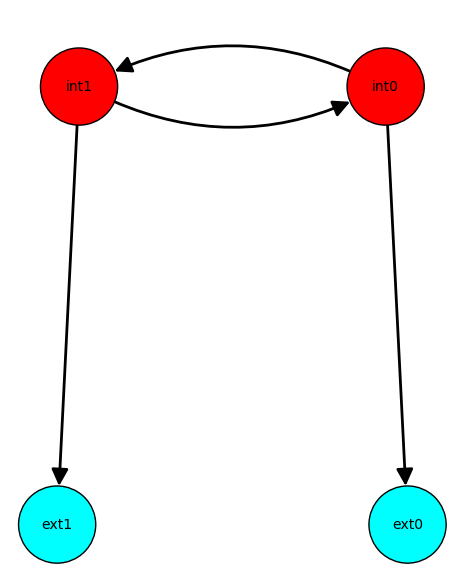

In [4]:
G.plot()

### Weights of graphs

We can also calculate the weight of a graph $\Gamma$, i.e. the coefficient $c_\Gamma$ above.  This depends on the propagator.

In [5]:
G.weight()

-1/24

This function first checks the list of pre-computed weights to see if the weight is already known. With a working install of Maple, it is possible to re-calculate the weight:

In [50]:
G.weight_calc()

RuntimeError: unable to start maple because the command 'maple -t -c "interface(screenwidth=infinity,errorcursor=false)"' failed: The command was not found or was not executable: maple.


In order to use the Maple interface you need to have Maple installed
and have a script in your PATH called "maple" that runs the
command-line version of Maple.  Alternatively, you could use a remote
connection to a server running Maple; for hints, type
    print(maple._install_hints_ssh())

  (1) You might have to buy Maple (http://webstore.maplesoft.com/).

  (2) * LINUX: The maple script comes standard with your Maple install.

      * APPLE OS X:
          (a) create a file called maple (in your PATH), with the following contents:
             #!/bin/sh
             /Library/Frameworks/Maple.framework/Versions/Current/bin/maple $@
          (b) Save the file.
          (c) Make the file executable.
                chmod +x maple

      * WINDOWS:
        You must install Maple-for-Linux into the VMware machine (sorry, that's
        the only way at present).


### Differential operator

We can also calculate the differential operator $B_\Gamma$ associated to a single graph.

In [6]:
P = poisson_brackets.SkewBracket(); x, y = P.vars
f = function('f')(x, y)
g = function('g')(x, y)
G.diffop(P, f, g)

1/4*t^2*x^2*diff(f(x, y), x)*diff(g(x, y), x) - 1/4*t^2*x*y*diff(f(x, y), y)*diff(g(x, y), x) - 1/4*t^2*x*y*diff(f(x, y), x)*diff(g(x, y), y) + 1/4*t^2*y^2*diff(f(x, y), y)*diff(g(x, y), y)

## Listing graphs

It is possible to generate all graphs appearing at a given order in the star product:

In [52]:
kontsevichgraphs.list(3)

lazy list [Kontsevich graph (Quantization) on (3, 2) vertices, Kontsevich graph (Quantization) on (3, 2) vertices, Kontsevich graph (Quantization) on (3, 2) vertices, ...]

*Technical aside*: the above function actually returns what is called a *lazy list*, which means the graphs aren't actually created until you specifically request them. This can be converted into a normal list by running `list(kontsevichgraphs.list(3))`. This will take a long time for $n \geq 6$: for $n = 6$ there are already ~48000 graphs, and this number grows like $(n!)^2$.

## Examples of graphs

The code provides shortcuts to generate various examples of graphs.  A list of these in-built examples can be found by typing `kontsevichgraphs.<TAB>` and using Sage's tab-completion system to list available options. For instance, one can create the *wedge graph on $n$ vertices*:

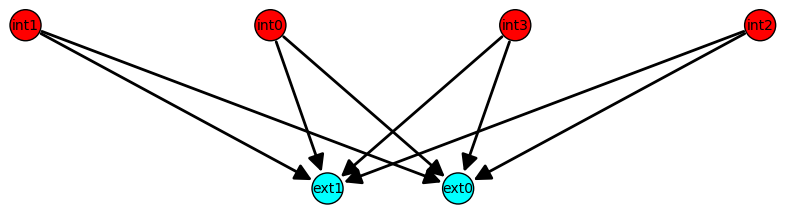

In [9]:
G = kontsevichgraphs.Wedge(4)
G.plot()

The weight of the wedge graph on $n$ vertices is $\frac{1}{2^n}$:

In [10]:
G.weight() == 1/2^4

(1/16) == (1/16)

[[Felder-Willwacher 2010]](http://dx.doi.org/10.1093/imrn/rnp155) exhibits a graph appearing at order $\hbar^7$ whose coefficient involves the conjecturally irrational number $\tfrac{\zeta(3)}{\pi^6}$:

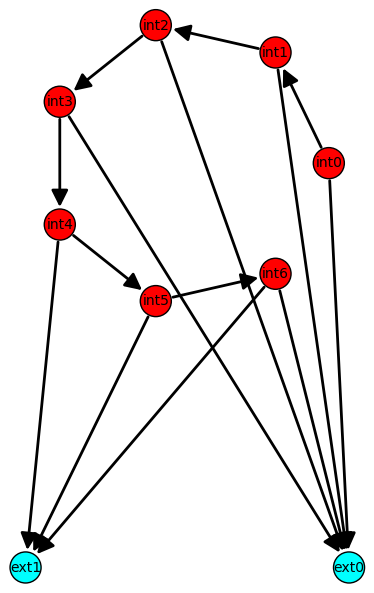

In [11]:
G = kontsevichgraphs.FelderWillwacher()
G.plot()

In [12]:
G.weight()

1/2903040*(13*pi^6 - 11340*zeta(3)^2)/pi^6